# HSE 2021: Mathematical Methods for Data Analysis


In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Python (2 points)

**Task 1** <br/> 
Enter numbers `a`,  `d` и `N`. Find sum of the first `N` members of arithmetic progression with the first member `a` and difference `d`, without using formula for the sum.

In [ ]:
def find_sum(a,d,N):
  arr_sum = 0
  for i in range(N):
    arr_sum += a
    a += d
  return arr_sum

a = 2
d = 3
N = 15
print(find_sum(a,d,N))

345


**Task 2**  <br/> 
Enter an integer number `N`. Check if it is a prime number.

In [3]:
def check_prime(N):
  d = 2
  check_result = False
  if N == 1:
    return False
  while N % d != 0:
    d += 1
  if d == N:
    check_result = True
  return check_result

for N in [1,3,8, 13, 111, 113, 237, 307, 479, 481]:
    print(N, check_prime(N))

1 False
3 True
8 False
13 True
111 False
113 True
237 False
307 True
479 True
481 False


**Task 3** <br/> 
Find the first `N` prime numbers (you may use the function from the precious task).

In [ ]:
def find_primes(N):
    primes = []
    start = 2
    while (N != 0):
      if (check_prime(start)):
        primes.append(start)
        N -= 1
      start += 1
    return primes

print(find_primes(5))
print(find_primes(10))
print(find_primes(20))

[2, 3, 5, 7, 11]
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29]
[2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47, 53, 59, 61, 67, 71]


**Task 4**  <br/> 
There are numbers: `a`, `b`, `c`. Without using functions `min`, `max` and other functions, find the maximum number.

In [ ]:
from random import randint
def find_max(a, b, c):
    max_ = a
    if max_ < b:
      max_ = b
    if max_ < c:
      max_ = c
    return max_

for i in range(10):
    
    a = randint(-100, 100)
    b = randint(-100, 100)
    c = randint(-100, 100)
    
    print(a, b, c, '\tMaximum:', find_max(a, b, c))

2 -86 -46 	Maximum: 2
18 69 99 	Maximum: 99
13 -80 -20 	Maximum: 13
39 25 -15 	Maximum: 39
12 -78 38 	Maximum: 38
47 20 -32 	Maximum: 47
-10 -28 41 	Maximum: 41
-73 -18 35 	Maximum: 35
48 -100 -97 	Maximum: 48
17 -96 46 	Maximum: 46


# 2. Numpy (4 points)

**Task 1**  <br/>
Create a random array (`np.random.rand()`) with length of 10 and with sum of its elements equals to 2.

In [ ]:
my_array = np.random.rand(10)
sum = my_array.sum()
my_array = (my_array / sum) * 2
print(len(my_array))
print(np.sum(my_array))

10
2.0000000000000004


**Task 2**  <br/>
Create two random arrays $a$ and $b$ with the same length. 

Calculate the following distances between the arrays **without using special funcrion. You may only use basic numpy operations.**:

* Euclidean Distance
$$ d(a, b) = \sqrt{\sum_i (a_i - b_i)^2} $$
* Manhattan Distance
$$ d(a, b) = \sum_i |a_i - b_i| $$
* Cosine Distance
$$ d(a, b) = 1 - \frac{a^\top b}{||a||_2\cdot||b||_2}$$


In [ ]:
def cal_euclidean(a, b):    
  distance = (a-b)**2
  distance = (np.sum(distance))**(1/2)
  return distance

def cal_manhattan(a, b):    
    distance = abs(a - b)
    distance = np.sum(distance)
    return distance

def cal_cosine(a, b):    
    a_norm = np.dot(a,a)**(1/2)
    b_norm = np.dot(b,b)**(1/2)
    distance = 1 - ((np.dot((np.transpose(a)),b))/(a_norm*b_norm))
    return distance

In [ ]:
a = np.random.randint(-10, 10, size=10)
b = np.random.randint(-10, 10, size=10)
print (a)
print (b)
print(cal_euclidean(a, b))
print(cal_manhattan(a, b))
print(cal_cosine(a, b))

[-10   6   1  -6  -5  -2   4   0   7   3]
[-10   7  -3   7  -2 -10 -10   3  -4  -2]
24.698178070456937
62
0.8479119854710016


**Task 3** <br/>
Create an array with shape of $5 \times 6$ with integers from [0,50]. Print a column that contains the maximum element of the array.

In [ ]:
my_array = np.random.randint(0,51,size = (5,6))
#print(np.max(my_array))
m = np.argmax(np.max(my_array, axis=0))
selected_column = my_array[:,m]

print('Shape: ',my_array.shape)
print('Array')
print(my_array)
print(selected_column)

46
Shape:  (5, 6)
Array
[[22 43 43  6 25 17]
 [ 0  0 16 33 15  0]
 [44  7 18 13 39 41]
 [35 29 36 36 26 44]
 [22  1 23 33 46 14]]
[25 15 39 26 46]


**Task 4**  <br/>

Replace all missing values in the following array with mean.

In [ ]:
arr = np.random.rand(10)
idx = np.random.randint(0, 10, 4)
arr[idx] = np.nan

arr

array([       nan, 0.60905148,        nan, 0.13554055, 0.05189233,
       0.62905437, 0.1848043 , 0.15112487,        nan, 0.83710162])

In [ ]:
average = np.nanmean(arr)
arr[np.isnan(arr)] = average
print(arr)

[0.37122422 0.60905148 0.37122422 0.13554055 0.05189233 0.62905437
 0.1848043  0.15112487 0.37122422 0.83710162]


**Task 5** <br/>
Create a function which takes an image ```X``` (3D array of the shape (n, m, 3)) as an input and returns the mean for all 3 channels (a vector of shape 3).

In [ ]:
def mean_channel(X):
  mean_vector = np.mean(X, axis=(0,1))
  return mean_vector

In [ ]:
n = 28
m = 16
X =  np.random.randint(-10, 10, size=(n,m,3))
mean_channel(X)

array([-0.30357143, -0.70982143, -0.38392857])

**Task 6**  <br/>
Create a function which takes a matrix ```X``` as an input and returns all its unique rows as a matrix, i.e. in a 3D matrix you need to return all unique horizontal layers.

Sample input:

     ([[[4, 4],
        [5, 5]],

       [[4, 5],
        [5, 5]],

       [[4, 4],
        [5, 4]],

       [[4, 5],
        [5, 5]],

       [[5, 4],
        [4, 4]],

       [[5, 5],
        [4, 5]]])
        
Sample output:

     ([[[4, 4],
        [5, 5]],

       [[4, 5],
        [5, 5]],

       [[4, 4],
        [5, 4]],

       [[5, 4],
        [4, 4]],

       [[5, 5],
        [4, 5]]])

In [ ]:
def get_unique_rows(X):
    X_unique = np.unique(X, axis=0)
    return X_unique

In [ ]:
X =  np.random.randint(4, 6, size=(n, 2, 2))
print(X)

[[[5 4]
  [5 5]]

 [[4 5]
  [5 4]]

 [[5 5]
  [4 4]]

 [[5 4]
  [5 4]]

 [[4 4]
  [5 5]]

 [[5 4]
  [4 4]]

 [[5 5]
  [5 5]]

 [[5 5]
  [5 5]]

 [[4 4]
  [4 4]]

 [[5 4]
  [5 4]]

 [[5 5]
  [4 4]]

 [[4 4]
  [5 5]]

 [[5 5]
  [5 4]]

 [[4 4]
  [4 4]]

 [[5 5]
  [4 4]]

 [[4 5]
  [4 4]]

 [[4 4]
  [4 4]]

 [[4 5]
  [5 5]]

 [[4 5]
  [5 5]]

 [[4 4]
  [4 5]]

 [[4 5]
  [4 5]]

 [[5 5]
  [4 4]]

 [[5 5]
  [5 4]]

 [[5 4]
  [5 4]]

 [[5 4]
  [4 4]]

 [[5 5]
  [5 5]]

 [[4 5]
  [4 4]]

 [[5 5]
  [4 5]]]


In [ ]:
get_unique_rows(X)

array([[[4, 4],
        [4, 4]],

       [[4, 4],
        [4, 5]],

       [[4, 4],
        [5, 5]],

       [[4, 5],
        [4, 4]],

       [[4, 5],
        [4, 5]],

       [[4, 5],
        [5, 4]],

       [[4, 5],
        [5, 5]],

       [[5, 4],
        [4, 4]],

       [[5, 4],
        [5, 4]],

       [[5, 4],
        [5, 5]],

       [[5, 5],
        [4, 4]],

       [[5, 5],
        [4, 5]],

       [[5, 5],
        [5, 4]],

       [[5, 5],
        [5, 5]]])

# 3. Pandas & Visualization (4 points)


You are going to work with *Titanic* dataset which contains information about passengers of Titanic:
- **Survived** - 1 - survived, 0 - died (0); **Target variable**
- **pclass** - passengers's class;
- **sex** - passengers's sex
- **Age** - passengers's age in years
- **sibsp**    - is the passenger someones siblings   
- **parch**    - is the passenger someones child or parent
- **ticket** - ticket number    
- **fare** - ticket price    
- **cabin** - cabin number
- **embarked** - port of Embarkation; C = Cherbourg, Q = Queenstown, S = Southampton

**Note** for all visualizations use matplotlib or seaborn but NOT plotly! Plotly's graphics sometimes vanish after saving. In this case the task wont't be graded.

**Note** support all your answers with necessary code, computations, vizualization, and explanation. Answers without code and explanation won't be graded.

In [ ]:
# load the dataset

from google.colab import files
uploaded = files.upload()

dataset = pd.read_csv('titanic.csv')

**Task 1**  <br/>
Answer the following questions:
    
    * Are there any missing values? In what columns?
    * How many classes (pclass) were there on Tinanic?
    * What is the percentage of survived passengers? Are the classes balanced?
    * What is the average ticket fare?
    * What what the most popular port of embarkation?
Please, write not only the answers but the code, proving it.

In [ ]:
## 1. Are there any missing values? In what columns?
# Yes. In columns: Age, Cabin, Embarked

for column in dataset.columns:
  is_nan = dataset[column].isnull().sum()
  if is_nan > 0:
    print(column)


Age
Cabin
Embarked


In [ ]:
## 2. How many classes (pclass) were there on Tinanic?
# 3

dataset.groupby('Pclass').count().shape[0]

3

In [ ]:
## 3. What is the percentage of survived passengers? Are the classes balanced?
# 38.4%
# The classes of survived was not balanced 
# (First class - 39.8%; Second class - 25.4%; Third class - 34.8%)

perc_Survived = (dataset[dataset.Survived == 1].shape[0])/dataset.shape[0]
perc_FirstClass = (dataset[(dataset.Survived == 1) & (dataset.Pclass == 1)].shape[0])/(dataset[dataset.Survived == 1].shape[0])
perc_SecondClass = (dataset[(dataset.Survived == 1) & (dataset.Pclass == 2)].shape[0])/(dataset[dataset.Survived == 1].shape[0])
perc_ThirdClass = (dataset[(dataset.Survived == 1) & (dataset.Pclass == 3)].shape[0])/(dataset[dataset.Survived == 1].shape[0])

print("Percentage of survived: ", perc_Survived)
print("Percentage of survived from the first class (compare to the total number of all survived): ", perc_FirstClass)
print("Percentage of survived from the second class (compare to the total number of all survived): ", perc_SecondClass)
print("Percentage of survived from the third class (compare to the total number of all survived): ", perc_ThirdClass)


Percentage of survived:  0.3838383838383838
Percentage of survived from the first class (compare to the total number of all survived):  0.39766081871345027
Percentage of survived from the second class (compare to the total number of all survived):  0.2543859649122807
Percentage of survived from the third class (compare to the total number of all survived):  0.347953216374269


In [ ]:
## 4. What is the average ticket fare?
# 32.2

dataset['Fare'].mean()


32.2042079685746

In [ ]:
## 5. What what the most popular port of embarkation?
# S
extra_data = dataset.groupby('Embarked').count()
extra_data[extra_data['PassengerId']==extra_data['PassengerId'].max()]
#dataset.groupby('Embarked').count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin
Embarked,,,,,,,,,,,
S,644,644,644,644,644,554,644,644,644,644,129


**Task 2**  <br/>
Find all the titles of the passengers (example, *Capt., Mr.,Mme.*), which are written in the column Name, and answer the following questions:

    * How many are there unique titles?
    * How many are there passengers with every title?
    * What is the most popular man's title? And woman's title?
    
**Hint** You may select the title from the name as a word which contains a dot.

In [ ]:
## Your code here
new_data = dataset

for j in range(new_data.shape[0]):
  s = new_data.iloc[j,3]
  for i in s.split():
    if "." in i:
      new_data.iloc[j,3] = i
      break
new_data.groupby('Name').count()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Name,,,,,,,,,,,
Capt.,1,1,1,1,1,1,1,1,1,1,1
Col.,2,2,2,2,2,2,2,2,2,1,2
Countess.,1,1,1,1,1,1,1,1,1,1,1
Don.,1,1,1,1,1,1,1,1,1,0,1
Dr.,7,7,7,7,6,7,7,7,7,3,7
Jonkheer.,1,1,1,1,1,1,1,1,1,0,1
Lady.,1,1,1,1,1,1,1,1,1,1,1
Major.,2,2,2,2,2,2,2,2,2,2,2
Master.,40,40,40,40,36,40,40,40,40,7,40


In [ ]:
## 1. How many are there unique titles?
# 17

new_data.groupby('Name').count().shape[0]


17

In [ ]:
## 2. How many are there passengers with every title?
# Capt.	1
# Col.	2
# Countess.	1
# Don.	1
# Dr.	7
# Jonkheer.	1
# Lady.	1
# Major.	2
# Master.	40
# Miss.	182
# Mlle.	2
# Mme.	1
# Mr.	517
# Mrs.	125
# Ms.	1
# Rev.	6
# Sir.	1

extra_dataset = new_data.groupby('Name').count().iloc[:,0:1]
extra_dataset

,PassengerId
Name,
Capt.,1
Col.,2
Countess.,1
Don.,1
Dr.,7
Jonkheer.,1
Lady.,1
Major.,2
Master.,40


In [ ]:
## 3. What is the most popular man's title? And woman's title?
# For man: Mr. (517 people)
# For woman: Miss. (182 people)

sex_data = new_data.groupby(['Sex','Name']).count().iloc[:, 0:1]
sex_data_female = sex_data.loc['female']
max_female = sex_data_female.max()
woman_popular = sex_data_female.loc[sex_data_female['PassengerId'] == max_female[0]]

sex_data_male = sex_data.loc['male']
max_male = sex_data_male.max()
man_popular = sex_data_male.loc[sex_data_male['PassengerId'] == max_male[0]]

print("For man: ", man_popular)
print("For woman: ", woman_popular)

#sex_data

For man:        PassengerId
Name             
Mr.           517
For woman:         PassengerId
Name              
Miss.          182




```
# Выбран кодовый формат
```

**Task 3** <br/>
Visualize age distribution (you may use a histogram, for example). 

    * What is the minimal and maximum ages of the passengers? Visualize it on the plot
    * What is the mean age? Visualize it on the plot
    * Make conclusions about what you see on the plot

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


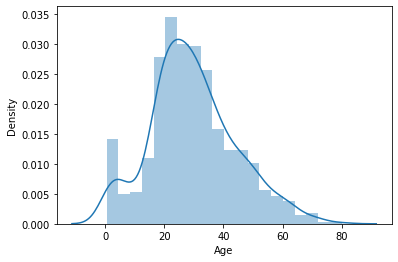

In [ ]:
## Visualization of age distribution

age_plot = sns.distplot(dataset['Age'])
fig = age_plot.get_figure()

Min:  0.42
Max:  80.0


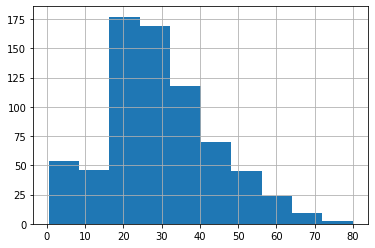

In [ ]:
## What is the minimal and maximum ages of the passengers? Visualize it on the plot
# Min:  0.42
# Max:  80.0

print("Min: ", dataset['Age'].min())
print("Max: ", dataset['Age'].max())
histo = dataset['Age'].hist()
fig = histo.get_figure()

Average:  29.69911764705882


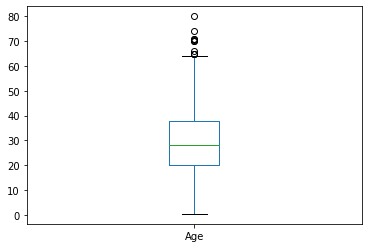

In [ ]:
##  What is the mean age? Visualize it on the plot
#   Average value is 29.7

print("Average: ", dataset['Age'].mean())
dataset['Age'].plot(kind='box')

In [ ]:
##  Make conclusions about what you see on the plot
#   On the plot we can see kind of normal distribution with average equals to 
#   29.7 years old (average age of all passengers). The minimum and maximum ages
#   are 0.42 and 80 years old respectively.


**Task 4**  <br/>
Visualize age distribution for survived and not survived passengers separately and calculate the mean age for each class. Are they different? Make conclusions about what you see on the plot

/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


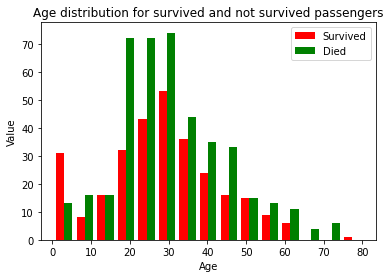

In [ ]:
## Visualize age distribution for survived and not survived passengers

data_plt = dataset[['Age','Survived']]
data_plt_survived = data_plt[data_plt['Survived'] == 1]
data_plt_died = data_plt[data_plt['Survived'] == 0]


plt.hist((data_plt_survived['Age'],data_plt_died['Age'] ), bins=15, color = ("red","green"), label = ("Survived","Died"))
plt.title('Age distribution for survived and not survived passengers')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Value')
plt.show()


Average survived:  28.343689655172415
Average: died 30.62617924528302


/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/usr/local/lib/python3.6/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


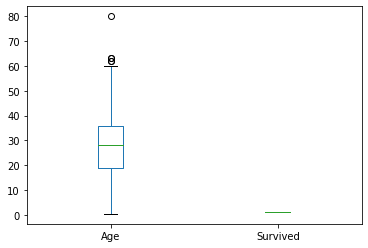

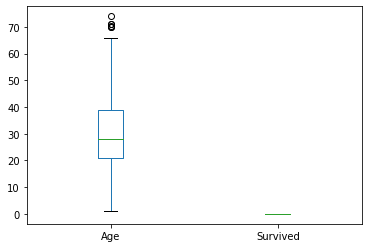

In [ ]:
## Calculate the mean age for each class. Are they different?
# Average survived:  28.34
# Average: died 30.63
# As we can see average ages of each class is for about the same (4 years of differеnce)

print("Average survived: ", data_plt_survived['Age'].mean())
print("Average: died", data_plt_died['Age'].mean())
data_plt_survived.plot(kind='box')
data_plt_died.plot(kind='box')

In [ ]:
## Make conclusions about what you see on the plot
#  From the plots we can conclude, that average ages of each class(Survived and Died) is 28.34 and 30.63 respectively.
#  From the first plot we can conclude, that the biggest part of dead people was for about 20-30 y.o.